In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from IPython import display
display.set_matplotlib_formats('svg')

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  # This is added back by InteractiveShellApp.init_path()


# LINEAR REGRESSION

<p><b>Lý thuyết</b></p>

<p>Đầu vào là vector</p> 
$$ e^{i \pi} + 1 = 0 $$

## IMPORT DATA

In [11]:
dataset = load_boston()

In [18]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## FEATURE SELECTION

<AxesSubplot:>

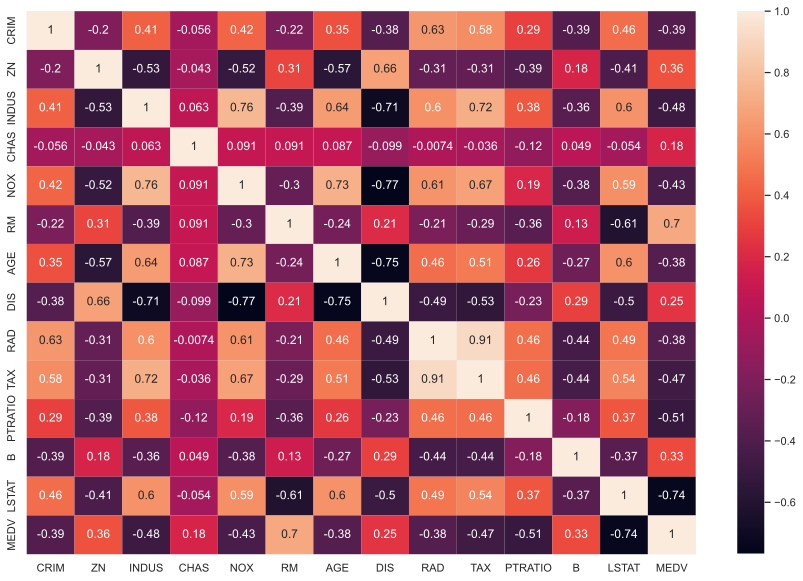

In [42]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

In [27]:
# 3 thuộc tính có tương quan lớn nhất với nhãn MEDV
print(df.corr().abs().nlargest(3, 'MEDV').index)

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


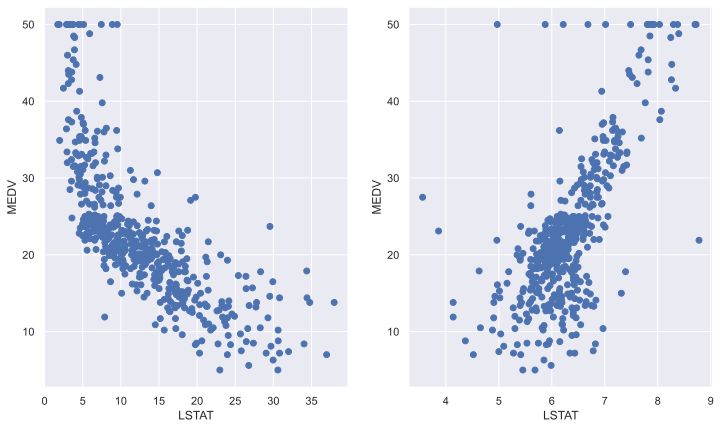

In [47]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.subplot(1, 2, 2)
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.show()

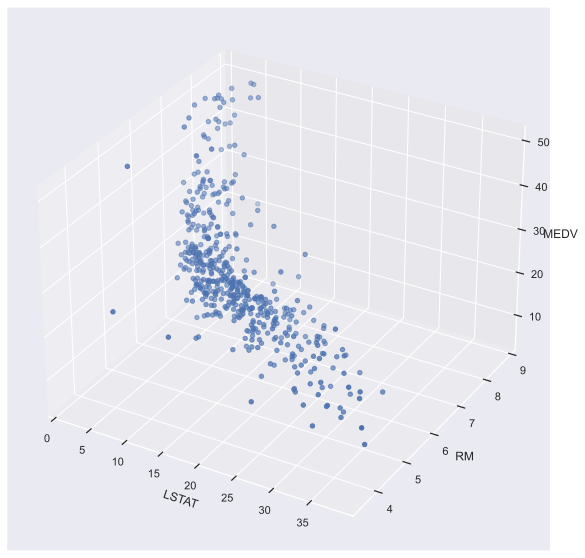

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
df['RM'],
df['MEDV'],
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

## BUILD MODEL

In [51]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y = df['MEDV']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
random_state=5)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [56]:
print('R-Squared: %.4f' % model.score(X_test,y_test))

R-Squared: 0.6162


36.49422110915324


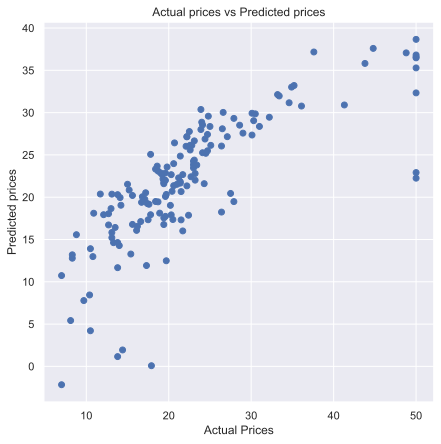

In [59]:
mse = mean_squared_error(y_test, prediction)
print(mse)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

# POLYNOMIAL REGRESSION

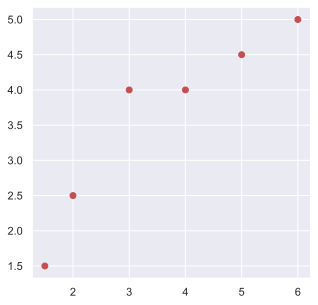

In [71]:
X = np.array([[1.5,2,3,4,5,6]]).T
y = np.array([1.5,2.5,4,4,4.5,5])

plt.figure(figsize=(5, 5))
plt.plot(X, y, 'ro');

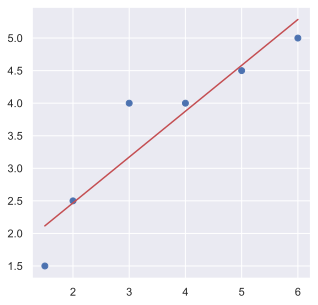

In [73]:
model.fit(X,y)
prediction = model.predict(X)
plt.figure(figsize=(5,5))
plt.plot(X, y, 'bo')
plt.plot(X, prediction, color='r')
plt.show()

In [74]:
print('R-Squared for training set: %.4f' % model.score(X,y))

R-Squared for training set: 0.8658


In [87]:
polynomial_features = PolynomialFeatures(degree=2)
X_square = polynomial_features.fit_transform(X)
print(X_square)

[[ 1.    1.5   2.25]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    5.   25.  ]
 [ 1.    6.   36.  ]]


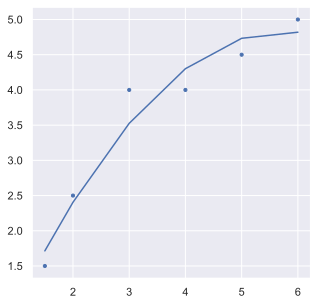

In [88]:
model.fit(X_square, y)
y_poly_pred = model.predict(X_square)
#---plot the points---
plt.figure(figsize=(5,5))
plt.scatter(X, y, s=10)
#---plot the regression line---
plt.plot(X, y_poly_pred)
plt.show()

In [89]:
print('R-Squared for training set: %.4f' % model.score(X_square,y))

R-Squared for training set: 0.9474


# BIAS & VARIANCE

<p>high bias (underfit): Mô hình không học tốt với tập train (Thường dẫn đến Loss train, Loss test cao)</p>
<p>high variance (overfit): Mô hình quá 'fit' với tập train (do mô hình quá phức tạp) nhưng không dự đoán tốt với tập test (Loss train nhỏ, Loss test >> Loss train)</p>

In [92]:
from IPython.display import Image
Image(url='https://images.viblo.asia/99634e83-bc1c-40db-bd23-7b22ddb644d8.jpeg') 

# TỐI ƯU LR BẰNG GRADIENT DESCENT

In [108]:
# Tạo dữ liệu giả
n = 20
X = np.random.randint(low=20, high=150, size=n).reshape(-1, 1)
noise = np.random.normal(0, 1, n).reshape(-1, 1)
y = 15*X + 8 + 25*noise
print(X, y)

[[ 60]
 [ 95]
 [ 96]
 [ 57]
 [ 58]
 [ 69]
 [ 75]
 [ 56]
 [113]
 [ 97]
 [ 28]
 [ 61]
 [ 99]
 [110]
 [ 38]
 [ 87]
 [ 33]
 [ 86]
 [108]
 [128]] [[ 872.69032329]
 [1449.57803597]
 [1476.60093731]
 [ 835.61918571]
 [ 859.94322187]
 [1064.5849591 ]
 [1118.30064305]
 [ 850.8083075 ]
 [1682.40049979]
 [1475.91903226]
 [ 424.56194807]
 [ 920.13355188]
 [1446.1155549 ]
 [1662.75876532]
 [ 562.36668347]
 [1286.6693583 ]
 [ 500.69072869]
 [1322.34359483]
 [1651.99606326]
 [1900.33647008]]


In [109]:
one = np.ones(n, dtype=int).reshape(-1,1)
X = np.concatenate((one, X), axis=1)

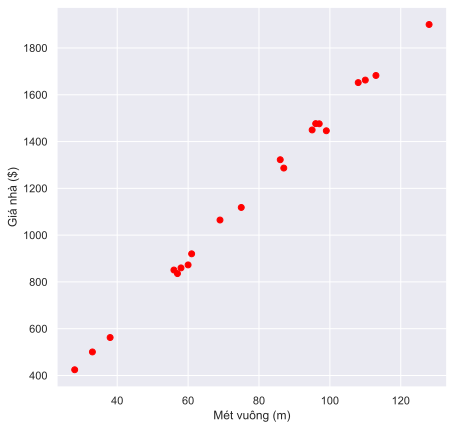

In [110]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [112]:
def predict(w, X): 
  return np.dot(X, w)

def MSELoss(y_pred, y):
  return 0.5*1/y.shape[0]*np.sum((y_pred-y)**2)

def gradient_descent(lr, epochs, w, threshold):
  history = []
  for i in range(epochs):
    w = w - lr * np.dot(X.T, predict(w, X)-y)
    loss = MSELoss(predict(w, X), y)
    print(f'epochs {i + 1}: w = {w}, loss = {loss}')
    history.append(loss)
    if loss <= threshold: return w
  
  return w, np.array(history)

In [113]:
# khởi tạo giá trị tham số cho gradient descent
w = np.array([[0.], [1.]])
print(w)

[[0.]
 [1.]]


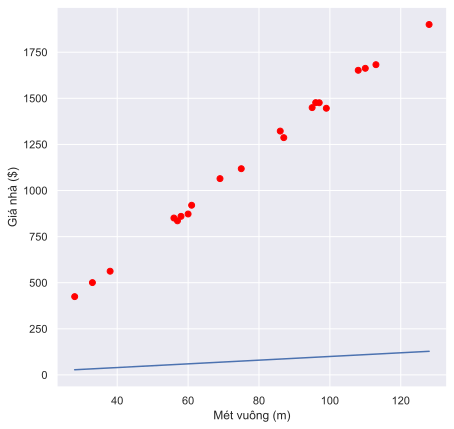

In [114]:
plt.figure(figsize=(7,7))
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [115]:
learning_rate = 0.000001
epochs = 50
threshold = 1e-6

w, history = gradient_descent(learning_rate, epochs, w, threshold)

epochs 1: w = [[0.02181042]
 [2.91077354]], loss = 500707.13855569065
epochs 2: w = [[0.04065106]
 [4.56144545]], loss = 373727.18073555076
epochs 3: w = [[0.05692618]
 [5.98742172]], loss = 278964.3000999903
epochs 4: w = [[0.070985  ]
 [7.21928878]], loss = 208244.4502864822
epochs 5: w = [[0.08312923]
 [8.28346949]], loss = 155467.48609845378
epochs 6: w = [[0.09361947]
 [9.20278995]], loss = 116080.97783721113
epochs 7: w = [[0.10268088]
 [9.99696908]], loss = 86687.52831076714
epochs 8: w = [[ 0.11050795]
 [10.68304158]], loss = 64751.72051236743
epochs 9: w = [[ 0.11726871]
 [11.27572333]], loss = 48381.41789309716
epochs 10: w = [[ 0.12310831]
 [11.78772704]], loss = 36164.5526510124
epochs 11: w = [[ 0.12815214]
 [12.23003489]], loss = 27047.32373859857
epochs 12: w = [[ 0.13250852]
 [12.61213416]], loss = 20243.29820538829
epochs 13: w = [[ 0.13627103]
 [12.94222065]], loss = 15165.575149129187
epochs 14: w = [[ 0.13952051]
 [13.22737454]], loss = 11376.160880899739
epochs 15:

In [116]:
print(w)

[[ 0.15984814]
 [15.0277072 ]]


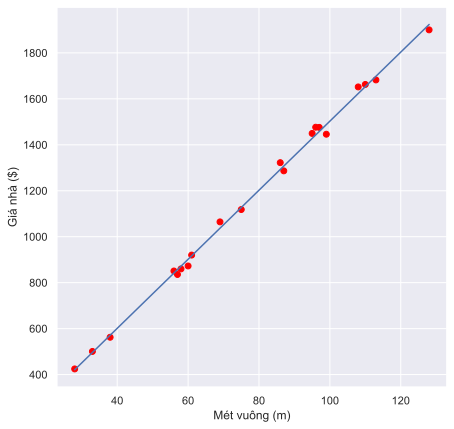

In [117]:
plt.figure(figsize=(7,7))
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

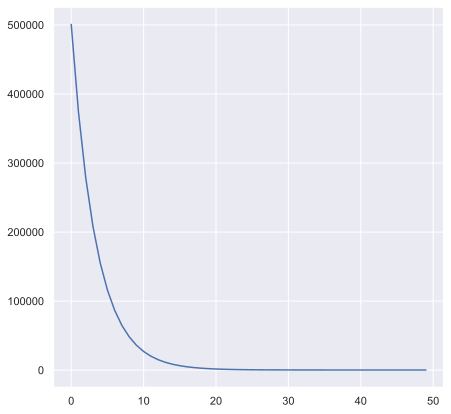

In [118]:
plt.figure(figsize=(7,7))
plt.plot(history)
plt.show()